In [1]:
#Enviroment 10
# # Import necessary packages
#import os
#from urllib.request import urlretrieve 
#import zipfile
import numpy as np 
import matplotlib.pyplot as plt
##from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#import requests
#from scipy import interpolate
from scipy.signal import savgol_filter
#from sys import stdout
#import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Converting batch and Ramna data into Dataframe
#import pandas as pd
data = pd.read_csv('100_Batches_IndPenSim_V3.csv') 
# Converting summary statisic data into Dataframe
#data_summary = pd.read_csv('100_Batches_IndPenSim_Statistics.csv')

In [14]:
data.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,0.0,0.0
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,1.414688e+06,1.422458e+06,1.429568e+06,1.435311e+06,1.439196e+06,1.441100e+06,1.441329e+06,1.440539e+06,NaN,NaN
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,6.561401e+05,6.569029e+05,6.576540e+05,6.583792e+05,6.590689e+05,6.597212e+05,6.603415e+05,6.609441e+05,NaN,NaN
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,8.384900e+05,8.457550e+05,8.523800e+05,8.575200e+05,8.608000e+05,8.620850e+05,8.617850e+05,8.604450e+05,NaN,NaN
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,1.421700e+06,1.429600e+06,1.436700e+06,1.442500e+06,1.446400e+06,1.448400e+06,1.448600e+06,1.447800e+06,NaN,NaN
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,1.964700e+06,1.973100e+06,1.980800e+06,1.987100e+06,1.991500e+06,1.994100e+06,1.994900e+06,1.994600e+06,NaN,NaN
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,2.902800e+06,2.911800e+06,2.920100e+06,2.927200e+06,2.932700e+06,2.936400e+06,2.938300e+06,2.939400e+06,NaN,NaN


In [4]:
#data[ 'Offline Penicillin concentration(P_offline:P(g L^{-1}))'][0:30]

In [16]:
data1=data
data1 = data1.loc[data1['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].notnull()]
#data1 = data1.loc[data1['Offline Penicillin concentration(P_offline:P(g L^{-1}))']> 0.50393810]
data1

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
59,12.0,42,100,15,0.0000,61.5350,168.1500,0.0001,0,0.6,...,514010.0,521110.0,527500.0,532420.0,535620.0,536880.0,536630.0,535080.0,NaN,NaN
119,24.0,55,100,150,0.0000,225.0000,226.6800,0.0001,0,0.7,...,469120.0,475960.0,482140.0,486900.0,489880.0,490640.0,489880.0,488330.0,NaN,NaN
179,36.0,55,100,43,0.0000,40.6350,147.1400,0.0001,0,0.9,...,561940.0,568870.0,575160.0,580100.0,583300.0,584490.0,583980.0,582850.0,NaN,NaN
239,48.0,60,100,57,0.0000,39.7660,139.2000,0.0001,0,1.1,...,685560.0,692840.0,699400.0,704470.0,707640.0,708890.0,708310.0,706810.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113744,192.0,75,100,80,3.6321,0.0000,49.6750,1.1732,150,0.9,...,901190.0,908480.0,915050.0,920140.0,923450.0,924770.0,924610.0,923810.0,NaN,NaN
113804,204.0,65,100,80,0.0000,14.1390,102.2900,13.1700,250,0.9,...,899740.0,907130.0,913780.0,919010.0,922280.0,923650.0,923480.0,922310.0,NaN,NaN
113864,216.0,65,100,80,0.0000,8.7419,8.2876,58.4390,250,0.9,...,839860.0,847370.0,854210.0,859670.0,863100.0,864410.0,864130.0,863100.0,NaN,NaN
113924,228.0,65,100,80,0.0000,6.1901,93.3950,11.9940,250,0.9,...,810820.0,818080.0,824590.0,829640.0,832810.0,833960.0,833390.0,831980.0,NaN,NaN


In [6]:
data1

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
59,12.0,42,100,15,0.0000,61.5350,168.1500,0.0001,0,0.6,...,514010.0,521110.0,527500.0,532420.0,535620.0,536880.0,536630.0,535080.0,NaN,NaN
119,24.0,55,100,150,0.0000,225.0000,226.6800,0.0001,0,0.7,...,469120.0,475960.0,482140.0,486900.0,489880.0,490640.0,489880.0,488330.0,NaN,NaN
179,36.0,55,100,43,0.0000,40.6350,147.1400,0.0001,0,0.9,...,561940.0,568870.0,575160.0,580100.0,583300.0,584490.0,583980.0,582850.0,NaN,NaN
239,48.0,60,100,57,0.0000,39.7660,139.2000,0.0001,0,1.1,...,685560.0,692840.0,699400.0,704470.0,707640.0,708890.0,708310.0,706810.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113744,192.0,75,100,80,3.6321,0.0000,49.6750,1.1732,150,0.9,...,901190.0,908480.0,915050.0,920140.0,923450.0,924770.0,924610.0,923810.0,NaN,NaN
113804,204.0,65,100,80,0.0000,14.1390,102.2900,13.1700,250,0.9,...,899740.0,907130.0,913780.0,919010.0,922280.0,923650.0,923480.0,922310.0,NaN,NaN
113864,216.0,65,100,80,0.0000,8.7419,8.2876,58.4390,250,0.9,...,839860.0,847370.0,854210.0,859670.0,863100.0,864410.0,864130.0,863100.0,NaN,NaN
113924,228.0,65,100,80,0.0000,6.1901,93.3950,11.9940,250,0.9,...,810820.0,818080.0,824590.0,829640.0,832810.0,833960.0,833390.0,831980.0,NaN,NaN


In [132]:
variable_raman_data = np.split(data1, [data1.columns.get_loc("2400")], axis=1)
raman_spectra = variable_raman_data [1]
variable_data = variable_raman_data [0]

In [133]:
raman_spectra = raman_spectra.drop(columns='202')
raman_spectra = raman_spectra.drop(columns='201')
raman_spectra


,2400,2399,2398,2397,2396,2395,2394,2393,2392,2391,...,212,211,210,209,208,207,206,205,204,203
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,22232.0,22578.0,22879.0,23043.0,22959.0,22814.0,22676.0,22622.0,22567.0,22513.0,...,500450.0,506940.0,514010.0,521110.0,527500.0,532420.0,535620.0,536880.0,536630.0,535080.0
119,20285.0,20516.0,20753.0,20922.0,21032.0,21164.0,21355.0,21534.0,21643.0,21704.0,...,456290.0,462370.0,469120.0,475960.0,482140.0,486900.0,489880.0,490640.0,489880.0,488330.0
179,26653.0,26910.0,27110.0,27169.0,26899.0,26621.0,26619.0,26728.0,26806.0,26864.0,...,549070.0,555170.0,561940.0,568870.0,575160.0,580100.0,583300.0,584490.0,583980.0,582850.0
239,37321.0,37353.0,37437.0,37564.0,37656.0,37747.0,37886.0,38003.0,38044.0,38010.0,...,671830.0,678360.0,685560.0,692840.0,699400.0,704470.0,707640.0,708890.0,708310.0,706810.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113744,52092.0,52281.0,52297.0,52210.0,52046.0,51892.0,51760.0,51697.0,51621.0,51583.0,...,887340.0,893910.0,901190.0,908480.0,915050.0,920140.0,923450.0,924770.0,924610.0,923810.0
113804,51056.0,51754.0,52273.0,52414.0,52252.0,52097.0,52141.0,52268.0,52345.0,52475.0,...,885730.0,892440.0,899740.0,907130.0,913780.0,919010.0,922280.0,923650.0,923480.0,922310.0
113864,46930.0,47066.0,47160.0,47345.0,47406.0,47313.0,47461.0,47696.0,47931.0,48038.0,...,825740.0,832440.0,839860.0,847370.0,854210.0,859670.0,863100.0,864410.0,864130.0,863100.0
113924,43895.0,43926.0,43904.0,43923.0,43636.0,43420.0,43415.0,43580.0,43733.0,43860.0,...,796940.0,803610.0,810820.0,818080.0,824590.0,829640.0,832810.0,833960.0,833390.0,831980.0


In [134]:
variable_data

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag
4,1.0,30.0,100.0,8.0,0.5181,18.9080,1.1045,0.0001,0.0,0.6,...,0.0,4.083,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
59,12.0,42.0,100.0,15.0,0.0000,61.5350,168.1500,0.0001,0.0,0.6,...,0.0,10.792,0.0,0.0,1.0,1.0,1.0,0.0,21523.0,21661.0
119,24.0,55.0,100.0,150.0,0.0000,225.0000,226.6800,0.0001,0.0,0.7,...,0.0,21.978,0.0,0.0,1.0,1.0,1.0,0.0,20677.0,20314.0
179,36.0,55.0,100.0,43.0,0.0000,40.6350,147.1400,0.0001,0.0,0.9,...,0.0,35.283,0.0,0.0,1.0,1.0,1.0,0.0,26823.0,26638.0
239,48.0,60.0,100.0,57.0,0.0000,39.7660,139.2000,0.0001,0.0,1.1,...,0.0,49.221,0.0,0.0,1.0,1.0,1.0,0.0,37854.0,37521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113744,192.0,75.0,100.0,80.0,3.6321,0.0000,49.6750,1.1732,150.0,0.9,...,0.0,110.280,0.0,0.0,1.0,100.0,100.0,1.0,52269.0,52130.0
113804,204.0,65.0,100.0,80.0,0.0000,14.1390,102.2900,13.1700,250.0,0.9,...,0.0,115.890,0.0,0.0,1.0,100.0,100.0,1.0,50543.0,50565.0
113864,216.0,65.0,100.0,80.0,0.0000,8.7419,8.2876,58.4390,250.0,0.9,...,0.0,116.940,0.0,0.0,1.0,100.0,100.0,1.0,46727.0,46912.0
113924,228.0,65.0,100.0,80.0,0.0000,6.1901,93.3950,11.9940,250.0,0.9,...,0.0,117.800,0.0,0.0,1.0,100.0,100.0,1.0,44101.0,43948.0


In [135]:
#bound of spectrum
start_line=0 #start line
n=200000 #number of line
start_wavelength = 1100 #start wavelength
end_wavelength = 1350 #end wavelength

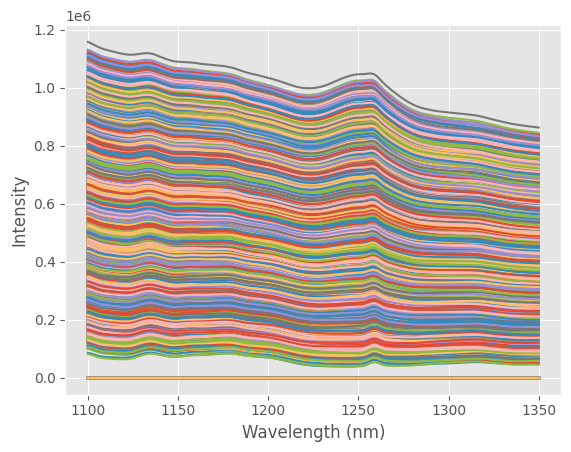

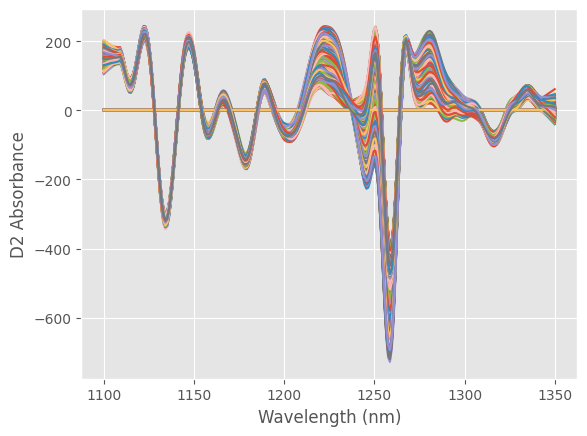

In [136]:
#-------------------------
Intensity = raman_spectra.iloc[start_line:start_line+n,start_wavelength:end_wavelength]
X = Intensity.values
size=len(X[1])
#print(size)
#print('shape X',X.shape)
wl = np.linspace(end_wavelength,start_wavelength,size) #2198
#x_wave = raman_spectra.index[100:1500]
#print('wl shape',wl.shape)
with plt.style.context(('ggplot')):
    plt.plot(wl, X.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.show()
X1 = savgol_filter(X, 17, polyorder = 3,deriv=2)
# Plot second derivative
#plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(wl, X1.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Absorbance')
    plt.show()

In [138]:
from sklearn.model_selection import train_test_split, cross_validate
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=1234)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (1649, 250)
X_test Shape : (413, 250)
y_train Shape : (1649,)
y_test Shape : (413,)


In [139]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
X_train= scaled.fit_transform(X_train)
X_test= scaled.transform(X_test)

In [140]:
import xgboost as xgb

In [141]:
def XGBoost(X_train,X_test,y_train,y_test):
    xgb_reg = xgb.XGBRegressor()
    xgb_reg.fit(X_train, y_train)
    y_head_train=xgb_reg.predict(X_train)
    y_head=xgb_reg.predict(X_test)
    score_c = r2_score(y_test, y_head)
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y_head, y_test)
    print('R2 : %5.3f'  % score_c)
    print('MSE : %5.3f' % mse_c)
    # Fit a line to the CV vs response
    z = np.polyfit(y_head, y_test, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_head, y_test, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_c))
        plt.xlabel('Predicted $^{\circ}$ Pen')
        plt.ylabel('Measured $^{\circ}$ Pen')
        plt.show()
    return xgb_reg 

R2 : 0.995
MSE : 0.462


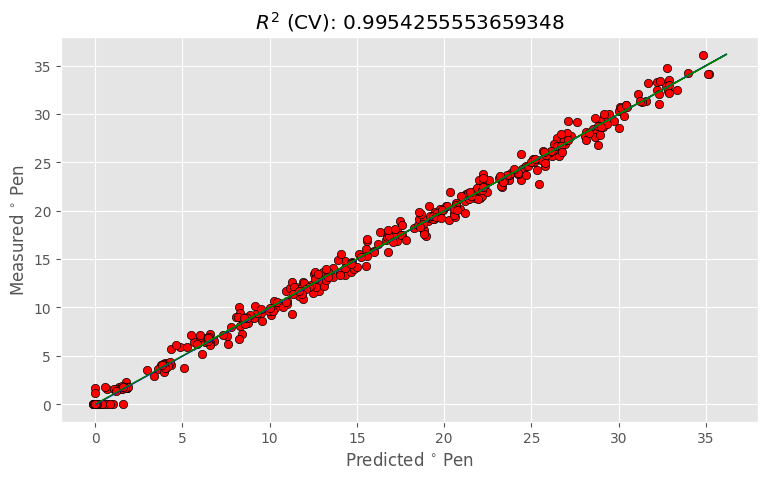

In [142]:
model_XGBoost=XGBoost(X_train,X_test,y_train,y_test)

In [160]:
import pickle
# save the model to disk
filename = 'XGBoost_ramman_model.h5'
pickle.dump(model_XGBoost, open(filename, 'wb'))

In [161]:

# save the model to disk
filename_scal = 'StandScal.h5'
pickle.dump(scaled, open(filename_scal, 'wb'))

In [163]:
loaded_model = pickle.load(open(filename, 'rb'))


In [164]:
y_test2=loaded_model.predict(X_test)

In [165]:
score_c = r2_score(y_test, y_test2)
# Calculate mean squared error for calibration and cross validation
mse_c = mean_squared_error(y_test, y_test2)
print('R2 : %5.3f'  % score_c)
print('MSE : %5.3f' % mse_c)

R2 : 0.995
MSE : 0.462


Working with online platform

In [115]:
data_online = data.loc[data['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].isnull()]

In [104]:
data_online.describe()
 

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
count,111873.000000,111873.000000,111873.0,111873.000000,111873.000000,111873.000000,111873.000000,111873.000000,111873.000000,111873.000000,...,1.118730e+05,1.118730e+05,1.118730e+05,1.118730e+05,1.118730e+05,1.118730e+05,1.118730e+05,1.118730e+05,0.0,0.0
mean,114.688522,65.261404,100.0,76.654912,0.072398,61.304972,74.252775,20.780942,154.842992,0.945319,...,1.414846e+06,1.422621e+06,1.429735e+06,1.435482e+06,1.439368e+06,1.441273e+06,1.441501e+06,1.440710e+06,NaN,NaN
std,66.895436,11.680114,0.0,25.586867,0.551434,44.831944,107.871488,50.336267,155.613149,0.134015,...,6.551067e+05,6.558586e+05,6.565997e+05,6.573171e+05,6.580018e+05,6.586522e+05,6.592732e+05,6.598781e+05,NaN,NaN
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.803000,11.163000,0.000100,0.000000,0.900000,...,8.387400e+05,8.459900e+05,8.526100e+05,8.578300e+05,8.612100e+05,8.625400e+05,8.620700e+05,8.607600e+05,NaN,NaN
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.432000,34.337000,0.153350,100.000000,0.900000,...,1.421400e+06,1.429300e+06,1.436400e+06,1.442200e+06,1.446200e+06,1.448100e+06,1.448300e+06,1.447700e+06,NaN,NaN
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.288000,94.875000,11.652000,250.000000,1.100000,...,1.964100e+06,1.972500e+06,1.980200e+06,1.986600e+06,1.991100e+06,1.993500e+06,1.994300e+06,1.993800e+06,NaN,NaN
max,289.800000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,2.902800e+06,2.911800e+06,2.920100e+06,2.927200e+06,2.932700e+06,2.936400e+06,2.938300e+06,2.939400e+06,NaN,NaN


In [116]:
data_online = np.split(data_online, [data_online.columns.get_loc("2400")], axis=1)
raman_spectra_online = data_online [1]
opeation_data_online = data_online [0]

In [117]:
raman_spectra_online = raman_spectra_online.drop(columns='202')
raman_spectra_online = raman_spectra_online.drop(columns='201')

In [ ]:
raman_spectra_online=raman_spectra_online.dropna()

In [166]:
start_wavelength = 1100 #start wavelength
end_wavelength = 1350 #end wavelength
Intensity = raman_spectra_online.iloc[start_line:start_line+n,start_wavelength:end_wavelength]
X = Intensity.values
X1 = savgol_filter(X, 17, polyorder = 3,deriv=2)

In [168]:
filename = 'XGBoost_ramman_model.h5'
loaded_model = pickle.load(open(filename, 'rb'))

filename_scal = 'StandScal.h5'
loaded_scale = pickle.load(open(filename_scal, 'rb'))
X1=loaded_scale.transform(X1)
X1.shape

In [176]:
y_online_predict=loaded_model.predict(X1)
y_online_predict

array([1.2198326e-03, 1.2198326e-03, 1.2198326e-03, ..., 3.7216954e+00,
       5.7826791e+00, 5.4247642e+00], dtype=float32)

Save ramman data to database 
- save full spectra (0-2400) but reduce 5 times
- 

In [197]:
raman_spectra_online.columns
len_ramman=len(raman_spectra_online.columns)
name=raman_spectra_online.columns
#print(name)
start=int(name[0])
end=int(name[-1])
print('start',start)
print('end',end)
i=start
new_ramman = []
while i > end:
    name= str(i)
    new_ramman.append (name)
    i=i-5
print(new_ramman)


start 2400
end 203


In [113]:
raman_spectra_online.shape

(0, 2200)

In [ ]:
raman_spectra = raman_spectra.drop(columns='202')
raman_spectra = raman_spectra.drop(columns='201')
raman_spectra

In [ ]:
dataonline = data.loc[data['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].isnull()]
variable_raman_data_online = np.split(dataonline, [dataonline.columns.get_loc("2400")], axis=1)
raman_spectra_online = variable_raman_data_online [1]
variable_data_online = variable_raman_data_online [0]


In [ ]:
#bound of spectrum
start_line=0 #start line
n=200000 #number of line

In [ ]:
#-------------------------
Intensity = raman_spectra_online.iloc[start_line:start_line+n,start_wavelength:end_wavelength]
X_online = Intensity.values
X1_online = savgol_filter(X_online, 17, polyorder = 3,deriv=2)

In [ ]:
y_pre_online= pls_opt.predict(X1_online)
y_pre_online


array([[-1.1046987 ],
       [-1.1046987 ],
       [-1.1046987 ],
       ...,
       [-1.33373663],
       [-1.34373649],
       [-1.30719682]])